   0  1
0  1  1
1  2  1
2  1  2
3  2  2
4  4  3
5  5  3
6  4  4
7  5  4
1 1 1
2 1 2
1 2 3
2 2 4
4 3 5
5 3 6
4 4 7
5 4 8


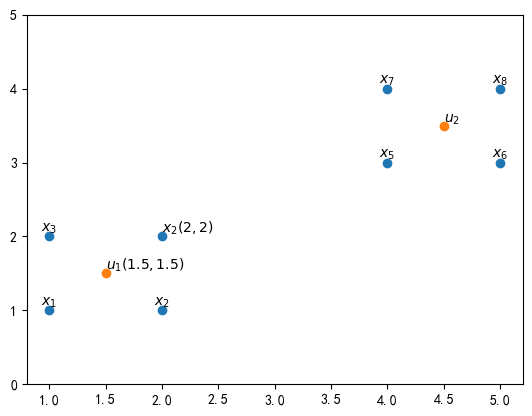

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

points = [(1,1),(2,1),(1,2),(2,2),(4,3),(5,3),(4,4),(5,4)]
data = pd.DataFrame(points)
print(data)
x = [i[0] for i in points]
y = [i[1] for i in points]

plt.scatter(x,y)
plt.ylim(0,5)

for a,b,c in zip(x,y,range(1,9)):
    print(a,b,c) 
    if a==2 and b==2:
        continue
    plt.text(a,b+0.07,r"$x_{}$".format(c),ha="center")


plt.text(2,2+0.05,r"$x_{2}(2,2)$")
plt.text(1.5, 1.5+0.05, r"$u_1(1.5,1.5)$")
plt.text(4.5, 3.5+0.05, r"$u_2$")

plt.scatter([1.5,4.5],[1.5,3.5])
plt.show()

1. 点 $x_2$ 到聚类中心 $u_1$ 的距离  
$$
d_{21} = \left[ \sum_{t=1}^{m}(x_{2t}-u_{1t})^2 \right]^{\frac{1}{2}}
$$

2. $n$ 个点 $x_{it}$ 到聚类中心 $u_{jt}$ 的距离  
$$
d_{n1} = \sum_{i=1}^{n} \left[ \sum_{t=1}^{m}(x_{it}-u_{1t})^2 \right]^{\frac{1}{2}}
$$

3. $n$ 个点 $x_{it}$ 到各聚类中心 $u_{jt}$ 的距离之和，此处给$d$ 换个名字 $J$
$$
J = \sum_{j=1}^{c}  \sum_{i=1}^{n}   \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}}
$$

2. 距离 $d$ 前定义隶属度 $a_{12}^p$，表示 ${x_{1}}$ 属于 ${u_2} $的隶属度. 
$$
J = \sum_{j=1}^{c}  \sum_{i=1}^{n}   a_{ij}^{p}    \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}}
$$

定义 $x_i$ 隶属于各类别的和为1

$$
    \sum_{j=1}^{c} a_{ij} =1 
$$

题目转变为：
在约束条件$\sum_{j=1}^{c} a_{ij} =1 $下，为求$min(J)$对应的参数 $a_{ij} $ 和 $u_{jt}$ , 即：隶属度和中心点。

$$
\arg \limits_{a_{ij},u_{jt}}  min J = \sum_{j=1}^{c} \sum_{i=1}^{n} a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}};  s.t \sum_{j=1}^{c} a_{ij} =1
$$

可用拉格朗日乘数法求解上述在等式约束下的优化问题，令拉格朗日函数为：
$$
\arg \limits_{a_{ij},u_{jt}}  min J = \sum_{j=1}^{c} \sum_{i=1}^{n} a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}} + \sum_{i=1}^{n} \lambda_{i}(\sum_{j=1}^{c} a_{ij} - 1)
$$

解：
函数J的第一项，为多个 $ a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}}$ 累加，
只需要关注$a_{ij}$这一个元素


$$
\frac{\partial J}{\partial a_{ij}} =  p a_{ij}^{p-1} \left[ \sum_{t=1}^{m}(x_{it}-u_{jt})^2 \right]^{\frac{1}{2}} +\lambda_i a_{ij}
$$



验证偏导公式是否正确，假设 $m=2$, $n=2$, $c=2$, 公式展开如下：

$$
    J =  \left[ a_{11}^p \sqrt[2]{(x_{11} - u_{11})^2+(x_{12} - u_{12})^2} + a_{21}^p \sqrt[2]{(x_{21} - u_{11})^2+(x_{22} - u_{12})^2} +
    a_{12}^p \sqrt[2]{(x_{11} - u_{21})^2+(x_{12} - u_{22})^2} + a_{21}^p \sqrt[2]{(x_{21} - u_{21})^2+(x_{22} - u_{22})^2} \right] + \\
    \left[  \lambda_1 (a_{11} + a_{12}-1) + \lambda_2 (a_{21}+a_{22}-1)     \right]
$$


$$
\frac{\partial J}{\partial u_{jt}} = -2 \frac{1}{2} a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{jt})^2 \right]^{-\frac{1}{2}} (x_{it}-u_{it})
$$
$$
 =  a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{jt})^2 \right]^{-\frac{1}{2}} (x_{it}-u_{it})
$$

$$
 =  a_{ij}^{p} \frac{1}{d_{ij}} (x_{it}-u_{jt})
$$

# 验证

可用拉格朗日乘数法求解上述在等式约束下的优化问题，令拉格朗日函数为：
$$
\arg \limits_{a_{ij},u_{jt}}  min J = \sum_{j=1}^{c} \sum_{i=1}^{n} a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}} + \sum_{i=1}^{n} \lambda_{i}(\sum_{j=1}^{c} a_{ij} - 1)
$$

可用拉格朗日乘数法求解上述在等式约束下的优化问题，令拉格朗日函数为：
$$
\arg \limits_{a_{ij},u_{jt}}  min J = \sum_{j=1}^{c} \sum_{i=1}^{n} a_{ij}^{p} \left[ \sum_{t=1}^{m}(x_{it}-u_{it})^2 \right]^{\frac{1}{2}} + \sum_{i=1}^{n} \lambda_{i}(\sum_{j=1}^{c} a_{ij} - 1)
$$

# Fuzzy C Means
模糊𝑐–均值聚类算法的基本思想：  
    与𝑘–均值聚类算法较为类似，使用模糊数学中属于[0,1]区间的隶属度指标度量单个样本隶属于各个簇的程度，  
    并规定每个样本到所有簇的隶属度之和均为1，  
    若某个样本到某个簇的隶属度为1，则表示该样本完全隶属于该簇。  


设： 

    i:样本id (1<i<n)
    m:样本点特征id (1<t<m)
    j:类别id (1<j<c)



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_excel("FCM.xlsx")

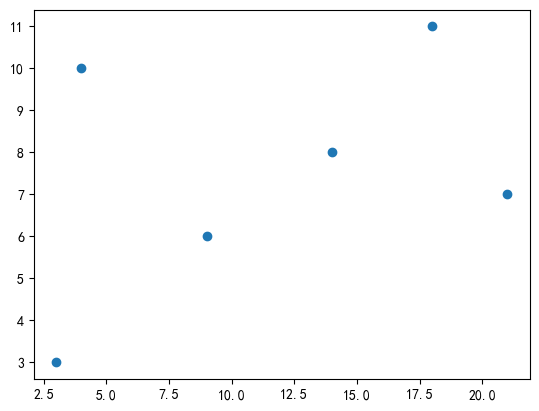

In [23]:
plt.scatter(data.iloc[0],data.iloc[1])